In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
 

In [24]:
#Data 불러오기. KMSK data를 다운 받음. BI에서 crosstap기능 이용
df = pd.read_csv('https://raw.githubusercontent.com/parandeung/BCWoo/main/KMSK.csv')
df.tail(5)

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8
158,2021-51,KQD 2111S,928,111,882,1921,2021,51,2021-12-13
159,2021-52,KNB 2111S,734,1,1112,1847,2021,52,2021-12-20
160,2021-53,KTJ 2111S,914,55,899,1868,2021,53,2021-12-27
161,2022-01,KSZ 2201S,682,60,1104,1846,2022,1,2022-01-01
162,2022-02,KQD 2201S,937,88,874,1899,2022,2,2022-01-03


In [25]:
# Data Processing
df['TEU']=df['Total']
df['Date'] = pd.to_datetime(df['Unnamed: 8'])
df.tail(2)

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8,TEU,Date
161,2022-01,KSZ 2201S,682,60,1104,1846,2022,1,2022-01-01,1846,2022-01-01
162,2022-02,KQD 2201S,937,88,874,1899,2022,2,2022-01-03,1899,2022-01-03


In [26]:
df.dtypes

Week                  object
Vsl_Voy               object
EST                    int64
JBT                    int64
OBT                    int64
Total                  int64
Year                   int64
Week.1                 int64
Unnamed: 8            object
TEU                    int64
Date          datetime64[ns]
dtype: object

In [27]:
df_t=df[:156]
df_t.tail()

,Week,Vsl_Voy,EST,JBT,OBT,Total,Year,Week.1,Unnamed: 8,TEU,Date
151,2021-44,KNB 2109S,864,167,814,1845,2021,44,2021-10-25,1845,2021-10-25
152,2021-45,KTJ 2109S,902,132,895,1929,2021,45,2021-11-01,1929,2021-11-01
153,2021-46,KSZ 2110S,827,103,802,1732,2021,46,2021-11-08,1732,2021-11-08
154,2021-47,KQD 2110S,962,136,802,1900,2021,47,2021-11-15,1900,2021-11-15
155,2021-48,KNB 2110S,817,146,962,1925,2021,48,2021-11-22,1925,2021-11-22


In [28]:
df_t=df_t[['Date','TEU']]
df_t.set_index("Date", inplace=True)
df_t.head(2)

,TEU
Date,
2018-10-01,1344
2018-10-08,1811


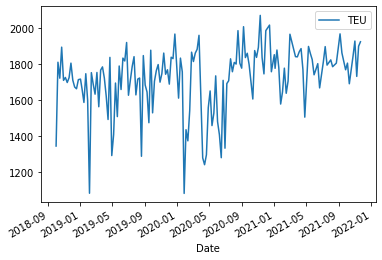

In [29]:
fig = df_t.plot()

In [30]:
#plt.figure(figsize=(10, 6))
#plt.plot(df_t['Date'], df_t['TEU'])

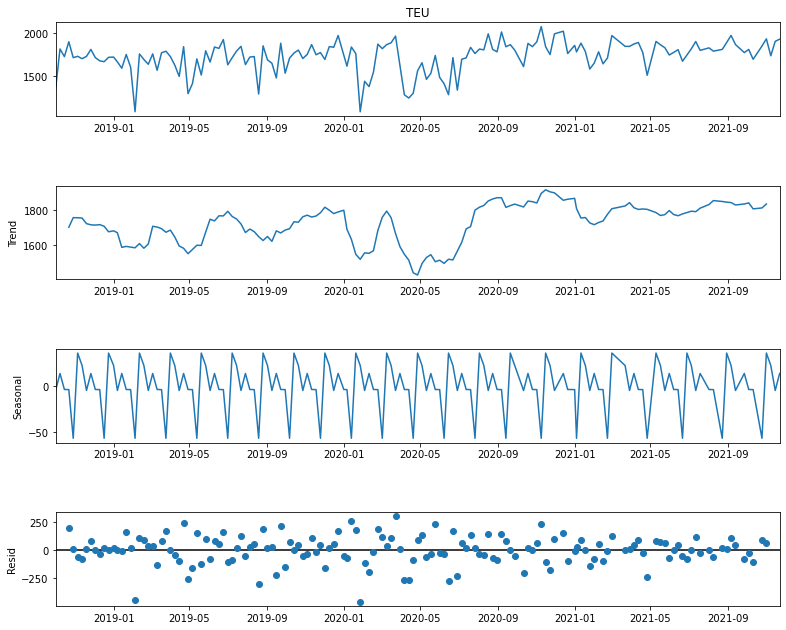

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_t['TEU'],model='additive', period=7)
fig=res.plot()
fig.set_size_inches(12,10)
plt.show()

In [32]:
!pip install --upgrade openpyxl

In [34]:
#!pip install pmdarima

In [35]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


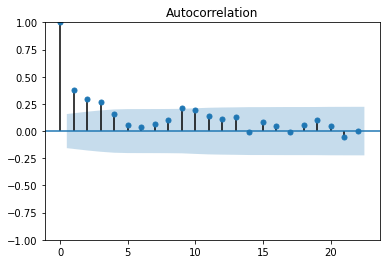

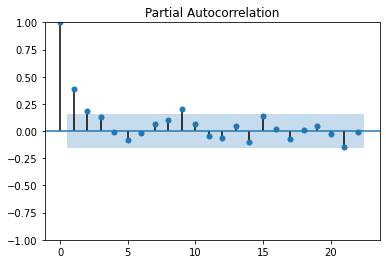

<Figure size 720x432 with 0 Axes>

In [42]:
plot_acf(df_t['TEU'])
plot_pacf(df_t['TEU'])
plt.figure(figsize=(10, 6))
plt.show()

# 차분

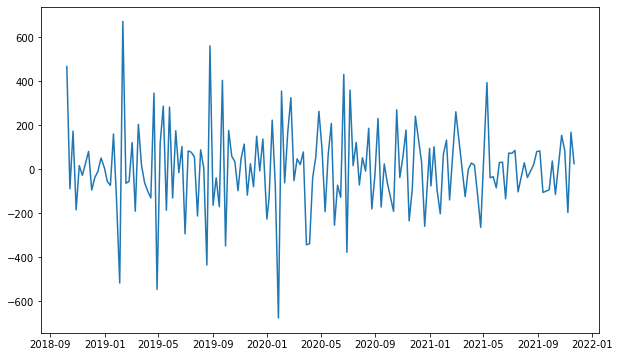

In [43]:
#1차 차분
diff_1=df_t['TEU'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_1)
plt.show()

# ACF, PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


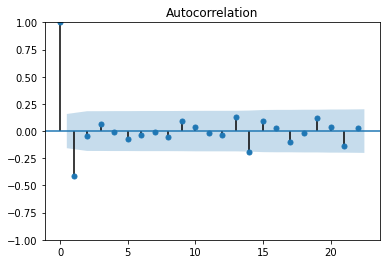

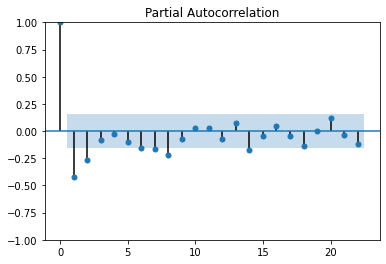

In [38]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# ARIMA(p,d,q)판단
 

In [51]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = ARIMA(df_t['TEU'], order = (2,1,0))
model_fit = model.fit(trend='nc', full_output = True, disp = True)
model_fit.summary()

NotImplementedError: ignored

In [ ]:
import itertools
#Parameter search
print('Examples of parameter combination for Seasonal ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools. product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(df_t.values, order = (i))
    model_fit = model.fit()
    print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(df_t['TEU'], order = (1,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
model_fit.summary()

# Evaluation

In [ ]:
model_fit.plot_predict()
plt.show()

In [ ]:
fore = model_fit.forecast(steps=6)
fore

In [ ]:
y_pred = pd.DataFrame(fore)
y_pred = y_pred.T.head(6)
y_pred.columns = ['yhat', 'diff','CI']

In [ ]:
y_pred['y']=pd.to_numeric(y_pred['yhat'])
y_pred.dtypes

In [ ]:
y_pred.round(2).head(5)

In [ ]:
y_true = df[157:]
y_true['y'] = pd.to_numeric(y_true['TEU'])

In [ ]:
y_true.head()

In [ ]:
import sklearn.metrics as skm
y_true = y_true['y'].values
y_pred = y_pred['y'].values
skm.mean_absolute_error(y_true, y_pred)

In [ ]:
[skm.mean_squared_error(y_true, y_pred).round(2), round((skm.mean_squared_error(y_true, y_pred))**0.5), skm.mean_absolute_percentage_error(y_true, y_pred)]

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
auto_arima_model = auto_arima(df_t, start_p = 0, start_q=0,
                              max_p=3, max_q=3, m=52,seasonal=True,
                              d=1,D=1,
                              maxP=3, max_Q=3,
                              trace = True,
                              error_action = 'ignore',
                              suppress_warning=True,
                              stepwise=False)

In [ ]:
auto_arima_model.summary()